In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
data = pd.read_csv('./data/changed_counts.csv')
real_test = pd.read_csv('./data/test_advance.csv')


In [4]:
print(data.head(1))

   Unnamed: 0    Id  Elevation  Aspect  Slope  \
0        9087  9088       3250     152     19   

   Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
0                               300                              -5   

   Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
0                             1124            240             237   

      ...       Highwater  EVDtH   EHDtH  Distanse_to_Hydrolody  Hydro_Fire_1  \
0     ...            True   3255  3190.0             300.041664          3054   

   Hydro_Fire_2  Hydro_Road_1  Hydro_Road_2  Fire_Road_1  Fire_Road_2  
0          2454          1424           824         3878         1630  

[1 rows x 68 columns]


In [7]:
print(data.describe())

         Unnamed: 0  Unnamed: 0.1            Id     Elevation        Aspect  \
count  64800.000000  64800.000000  64800.000000  64800.000000  64800.000000   
mean    7904.151806   7904.151806   7905.151806   3039.786898    158.559198   
std     4497.663094   4497.663094   4497.663094    291.707084    115.630542   
min        0.000000      0.000000      1.000000   1863.000000      0.000000   
25%     4100.750000   4100.750000   4101.750000   2948.000000     56.000000   
50%     8886.000000   8886.000000   8887.000000   3107.000000    124.000000   
75%    11328.250000  11328.250000  11329.250000   3226.000000    281.000000   
max    15119.000000  15119.000000  15120.000000   3849.000000    360.000000   

              Slope  Horizontal_Distance_To_Hydrology  \
count  64800.000000                      64800.000000   
mean      13.885370                        259.567423   
std        7.385029                        218.143038   
min        0.000000                          0.000000   
25%

In [5]:
data['Cover_Type'].unique()

array([1, 5, 2, 7, 3, 6, 4])

In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2)

In [10]:
train_X = train.drop('Cover_Type', axis=1)
train_Y = train['Cover_Type']
test_X = test.drop('Cover_Type', axis=1)
test_Y = test['Cover_Type']
data_X = data.drop('Cover_Type', axis=1)
data_Y = data['Cover_Type']

<h3> Random Forests </h3>

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
accuracies = []
for i in range(10, 100, 10):
    rf = RandomForestClassifier(max_depth=20, n_estimators=i, n_jobs=-1)
    rf.fit(train_X, train_Y)
    predicts = rf.predict(test_X)
    accuracy = (predicts == test_Y).sum() / len(test_Y)
    accuracies.append(accuracy)
    print('\r' + str(i), end='')


10

20

30

40

50

60

70

80

90

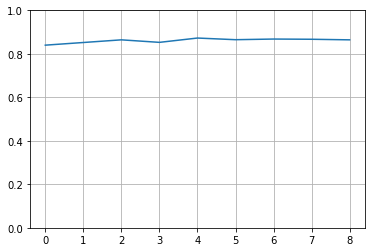

In [56]:
plt.plot(accuracies)
plt.ylim(0, 1)
plt.grid()

In [121]:
real_test = pd.read_csv('./data/test_advance.csv')
rf = RandomForestClassifier(max_depth=20, n_estimators=20)
rf.fit(train_X, train_Y)
# predicts = rf.predict(real_test)
# len(predicts)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [122]:
predicts = rf.predict(real_test)


ValueError: Number of features of the model must match the input. Model n_features is 68 and input n_features is 67 

In [11]:
(rf.predict(test_X) == test_Y).sum() / len(test_X)

In [15]:
rf_result.to_csv('./results/rf_advance.csv', index=False)

<h3> SVM </h3>

In [16]:
# from sklearn.svm import SVC

In [17]:
# svm = SVC(kernel='poly')

In [18]:
# svm.fit(train_X, train_Y)


In [19]:
# (svm.predict(test_X) == test_Y).sum() / len(test_Y)

<h3> Extra Tree Classifier </h3>

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=1500)
etc.fit(data_X, data_Y)

KeyboardInterrupt: 

In [ ]:
(etc.predict(test_X) == test_Y).sum() / len(test_X) # fake

0.9843364197530864

In [15]:
predicts = etc.predict(real_test)
etc_result = pd.DataFrame()
etc_result['Id'] = real_test['Id']
etc_result['Cover_Type'] = predicts

In [17]:
etc_result.to_csv('./results/etc_advance_resampled.csv', index=False)

In [31]:
print(data.groupby('Cover_Type').count())

            Unnamed: 0    Id  Elevation  Aspect  Slope  \
Cover_Type                                               
1                 2160  2160       2160    2160   2160   
2                 2160  2160       2160    2160   2160   
3                 2160  2160       2160    2160   2160   
4                 2160  2160       2160    2160   2160   
5                 2160  2160       2160    2160   2160   
6                 2160  2160       2160    2160   2160   
7                 2160  2160       2160    2160   2160   

            Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
Cover_Type                                                                     
1                                       2160                            2160   
2                                       2160                            2160   
3                                       2160                            2160   
4                                       2160                            2160 

In [79]:
weights = {}
for i in range(1, 8):
    weights[i] = (predicts == i).sum()
    print (i, (predicts == i).sum()/len(predicts))
    
handy_weights = {}
handy_weights[1] = 10
handy_weights[2] = 10
for i in range(3, 8):
    handy_weights[i] = 1

1 0.40602977246541744
2 0.382244315169679
3 0.06354215998812494
4 0.003825818354032218
5 0.046390477334897824
6 0.043467658139715704
7 0.05449979854813286


In [80]:
real_test = pd.read_csv('./data/test_advance.csv')
rf = RandomForestClassifier(max_depth=20, n_estimators=20, class_weight=handy_weights)
rf.fit(train_X, train_Y)
predicts = rf.predict(real_test)
len(predicts)

565892

In [70]:
rf_result = pd.DataFrame()
rf_result['Id'] = real_test['Id']
rf_result['Cover_Type'] = rf_result['Cover_Type'] = predicts

In [73]:
rf_result.to_csv('./results/rf_advance_weighted.csv', index=False)

In [82]:
(rf.predict(test_X) == test_Y).sum() / len(test_X)

0.8723544973544973

In [112]:
predicts.values_count()

AttributeError: 'numpy.ndarray' object has no attribute 'values_count'

In [19]:
len(data)

64800